# 1

In the K-Means algorithm, the objective function is usually defined as the **Within-Cluster Sum of Squares (WCSS)**, which measures the total squared distance between each data point and the center (centroid) of its assigned cluster.

The objective function can be written as:

$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} | x_i - \mu_k |^2
$$

where:

* $K$ is the number of clusters,
* $C_k$ is the set of data points assigned to cluster $k$,
* $x_i$ is a data point,
* $\mu_k$ is the centroid of cluster $k$.

To derive the formula for the **new cluster center**, we minimize the objective function with respect to $\mu_k$. Consider only the part of the function related to cluster $k$:

$$
J_k = \sum_{x_i \in C_k} | x_i - \mu_k |^2
$$

Taking the derivative of $J_k$ with respect to $\mu_k$ and setting it to zero:

$$
\frac{\partial J_k}{\partial \mu_k} = \frac{\partial}{\partial \mu_k} \sum_{x_i \in C_k} (x_i - \mu_k)^2 = -2 \sum_{x_i \in C_k} (x_i - \mu_k) = 0
$$

Solving for $\mu_k$:

$$
\sum_{x_i \in C_k} x_i = |C_k| \mu_k
$$

$$
\mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
$$

Therefore, the optimal cluster center that minimizes the WCSS is the **mean of all data points assigned to that cluster**. This result justifies why K-Means updates each centroid by computing the average of its cluster’s points in each iteration.


# 2

![elbow-method](https://media.geeksforgeeks.org/wp-content/uploads/20251111115104211390/elbow_method.webp)

## Working of Elbow Point

The Elbow Method works in the following steps:
1.  We begin by selecting a range of $k$ values (for example, 1 to 10).
2.  For each k, we run K-Means and calculate WCSS (Within-Cluster Sum of Squares), which shows how close the data points are to their cluster centroids:
    $$
        WCSS \sum_{i=1}^{k}\sum_{j=1}^{n_i} \text{distance}(x_{j}^{(i)},c_i)^2
    $$
3. After computing `WCSS` for all `k` values, we plot `k` vs `WCSS`.
4. `WCSS` always decreases as k increases because more clusters reduce the internal spread.
5. However, after a certain point, the improvement becomes very small. This bend or “elbow” in the curve indicates the point where adding more clusters no longer gives meaningful improvement.

* **Before the elbow**: WCSS drops quickly $\rightarrow$ clusters become much better.
* **After the elbow**: WCSS drops slowly $\rightarrow$ extra clusters add little value and may lead to overfitting.
![Elbow Point](https://media.geeksforgeeks.org/wp-content/uploads/20241028173908396970/Elbow-Method.png)

The goal is to identify the point where the rate of decrease in `WCSS` sharply changes, indicating that adding more clusters (beyond this point) yields diminishing returns. This "elbow" point suggests the optimal number of clusters.

## Understanding Distortion and Inertia in K-Means Clustering

Two metrics commonly used in the Elbow Method are Distortion and Inertia.

### 1. Distortion

Distortion measures the average squared distance between each data point and its assigned cluster center. It's a measure of how well the clusters represent the data. A lower distortion value indicates better clustering.

$$
\text{Distortion} = \frac{1}{n}\sum_{i=1}^{n} \min_{c \in \text{clusters}} ||x_i - c||^2
$$

### 2. Inertia

Inertia is the sum of squared distances of each data point to its closest cluster center. It's essentially the total squared error of the clustering. Like distortion, a lower inertia value suggests better clustering.

$$
\text{Inertia} = \sum_{i=1}^{n}\text{distance}(x_i, c_j^*)^2
$$

## Implementation of Elbow Method
Let's implement the Elbow method,

### Step 1: Importing the required libraries

In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Creating and Visualizing the data
We will create a random array and visualize its distribution

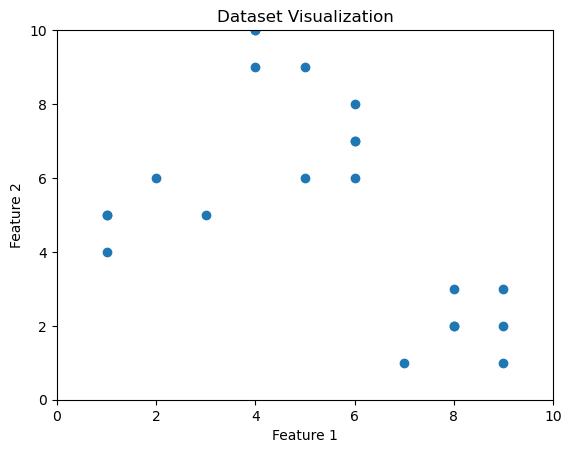

In [2]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6,
               7, 8, 9, 8, 9, 9, 8, 4, 4, 5, 4])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7,
               1, 2, 1, 2, 3, 2, 3, 9, 10, 9, 10])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.scatter(x1, x2, marker='o')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

From the above visualization, 
we can see that the optimal number of clusters should be around 3. But visualizing the data alone cannot always give the right answer. Hence we demonstrate the following steps.

### Step 3: Building the Clustering Model and Calculating Distortion and Inertia
In this step, we will fit the K-means model for different values of k (number of clusters) and calculate both the distortion and inertia for each value.

In [3]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
    
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])
    
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

C:\Users\Windows 11\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Windows 11\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Windows 11\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Windows 11\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~

## Step 4: Tabulating and Visualizing the Results
### a) Displaying Distortion Values

Distortion values:
1 : 14.90249433106576
2 : 5.146258503401359
3 : 1.8817838246409675
4 : 0.856122448979592
5 : 0.7166666666666667
6 : 0.5484126984126984
7 : 0.4325396825396825
8 : 0.3817460317460318
9 : 0.3341269841269841


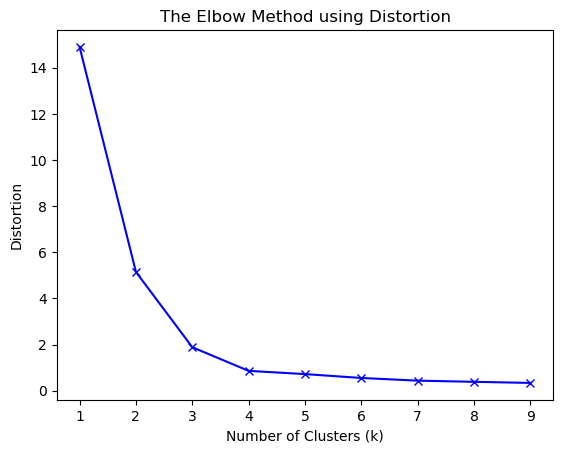

In [4]:
print("Distortion values:")
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

### b) Displaying Inertia Values:




Inertia values:
1 : 312.95238095238096
2 : 108.07142857142856
3 : 39.51746031746032
4 : 17.978571428571428
5 : 15.049999999999999
6 : 11.516666666666666
7 : 9.083333333333334
8 : 8.016666666666667
9 : 7.0166666666666675


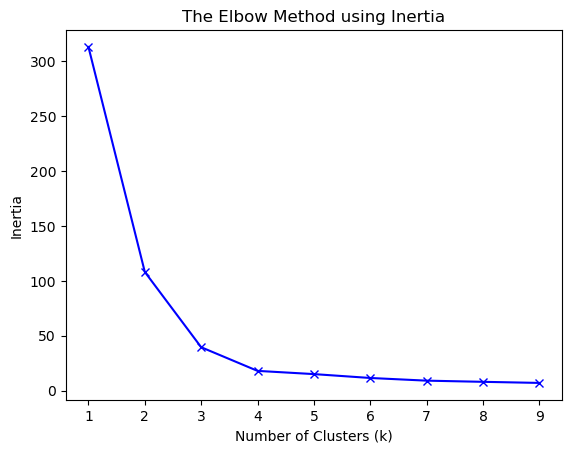

In [5]:
print("Inertia values:")
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### Step 5: Clustered Data Points For Different k Values
We will plot images of data points clustered for different values of k. For this, we will apply the k-means algorithm on the dataset by iterating on a range of k values.

C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


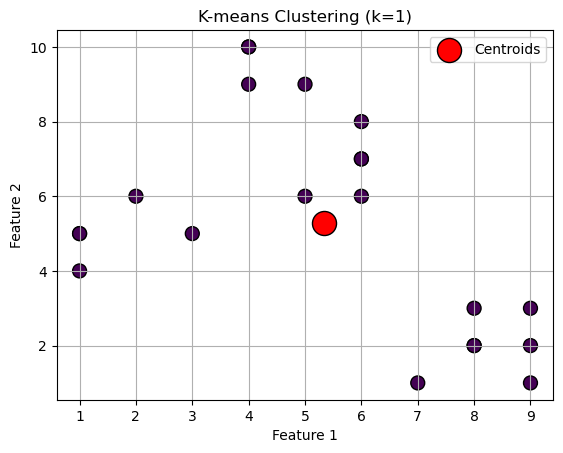

C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


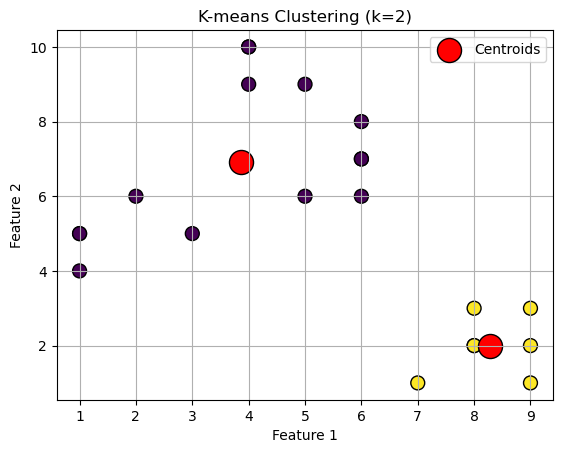

C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


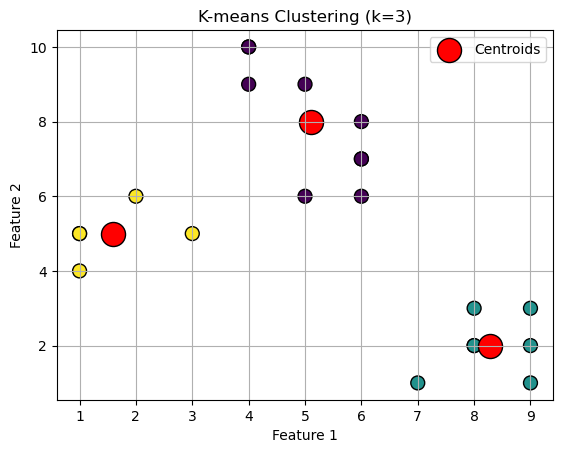

C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


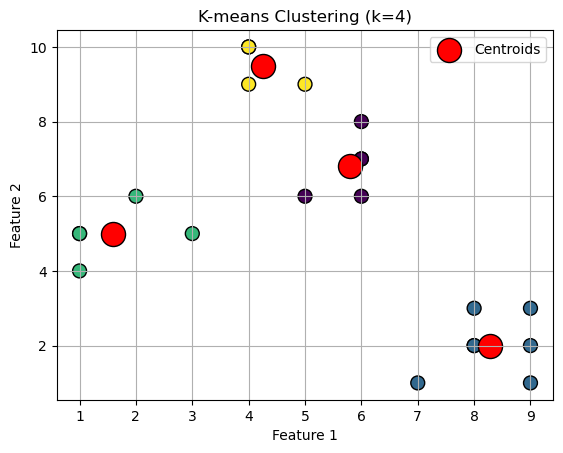

In [6]:
k_range = range(1, 5)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

The **elbow method does not help when there is no clear change in the rate of decrease of distortion (WCSS)** as the number of clusters $k$ increases. In such cases, the curve is smooth or nearly linear, and no “elbow” point can be identified.

---

## Scenarios Where the Elbow Method Fails

### 1. Data Has No Natural Cluster Structure

If the data is **uniformly distributed** or random, adding more clusters will always reduce WCSS gradually, but there is no meaningful number of clusters.

**Effect:**
The WCSS curve decreases smoothly with no sharp bend.

---

### 2. Clusters Overlap Strongly

When clusters overlap heavily or are not well-separated, the improvement from increasing $k$ is gradual.

**Effect:**
The elbow is ambiguous or subjective.

---

### 3. Non-Spherical or Unequal-Density Clusters

K-Means assumes spherical clusters of similar size. If the data violates this assumption, WCSS decreases steadily rather than sharply.

**Effect:**
The elbow does not reflect the true structure.

---

## Python Example: No Clear Elbow

Below is an example using **uniformly distributed data**, where the elbow method fails.

C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a m

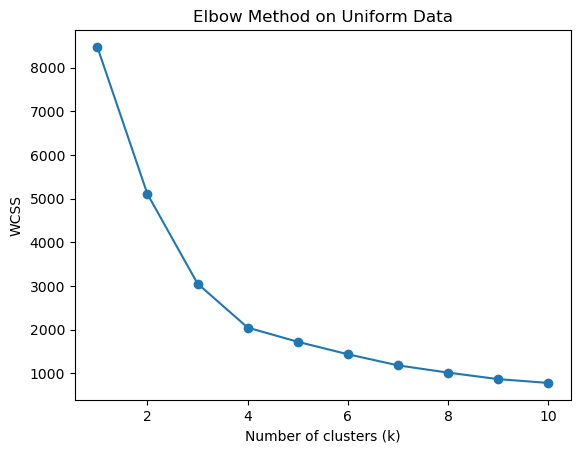

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate uniform random data (no natural clusters)
np.random.seed(42)
X = np.random.uniform(low=0, high=10, size=(500, 2))

# Compute WCSS for different k
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure()
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method on Uniform Data")
plt.show()


### What You Will Observe

* The WCSS decreases smoothly as (k) increases.
* There is **no clear elbow point**.
* Any chosen (k) would be arbitrary.

---

## Conclusion

The elbow method is ineffective when:

* The data lacks inherent clustering
* Clusters are overlapping or ill-defined
* K-Means assumptions are violated

In such cases, alternative methods such as **silhouette score**, **gap statistic**, or **density-based clustering (e.g., DBSCAN)** are more appropriate.

# 3.

The **Hungarian algorithm** is **not a clustering algorithm itself**. Instead, it is used in clustering **for optimal label matching**, primarily during **evaluation and comparison of clustering results**.

---

## Why the Hungarian Algorithm Is Needed in Clustering

Clustering algorithms (e.g., K-Means) assign **arbitrary cluster labels**. For example:

* True classes: `{0, 1, 2}`
* Predicted clusters: `{2, 0, 1}`

Even if the clustering is perfect, the labels will not match directly. Therefore, a direct accuracy comparison would be misleading.

The Hungarian algorithm solves this by finding the **optimal one-to-one mapping** between predicted cluster labels and true class labels.

---

## Core Use Case: Clustering Evaluation

### Problem

Given:

* Ground-truth class labels $y$
* Predicted cluster labels $\hat{y}$

We want to maximize the agreement between them.

### Solution

1. Build a **confusion matrix** between true labels and cluster labels.
2. Treat label matching as an **assignment problem**.
3. Use the Hungarian algorithm to find the label permutation that **maximizes correct matches**.

---

## Mathematical Formulation

Let:

* $C_{ij}$ = number of samples of true class $i$ assigned to cluster $j$

We want to find a permutation $\pi$ that maximizes:

$$
\sum_i C_{i,\pi(i)}
$$

The Hungarian algorithm finds this optimal assignment efficiently in $O(n^3)$.

In [14]:
class_names = [1, 2, 3]

def plot_cm(ax, cm, title):
    im = ax.imshow(cm, cmap=plt.cm.Blues)
    ax.set_title(title)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_xticks(range(len(class_names)))
    ax.set_yticks(range(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    
    # Annotate each cell
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="red")

C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Clustering accuracy after optimal label matching: 1.0


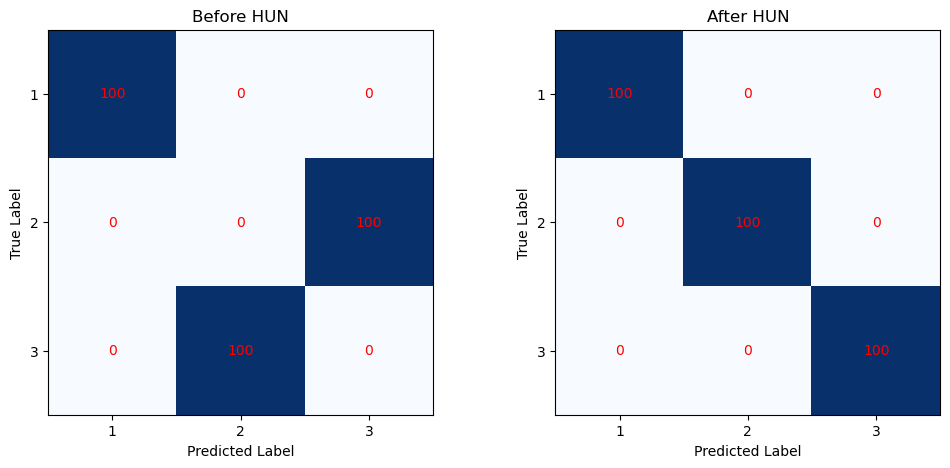

In [18]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# Generate data with true labels
X, y_true = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Hungarian algorithm (maximize matches)
row_ind, col_ind = linear_sum_assignment(-cm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_cm(axes[0], cm, "Before HUN")
plot_cm(axes[1], cm[:, col_ind], "After HUN")

print("Clustering accuracy after optimal label matching:", accuracy)

# 4. 
The Adjusted Rand Index (ARI) measures how similar two clusterings are, correcting the raw Rand Index for similarity that would be expected **by** chance. Its value ranges from -1 (worse than random) through 0 (random-like) to 1 (perfectly matching clusterings).[1][3][4][5][6]

## Concept

- ARI compares all pairs of points and checks whether each pair is in the same or different cluster in both partitions.[3][6]
- It starts from the Rand Index (proportion of pairs on which the two clusterings agree) and then subtracts the expected agreement under random labeling and rescales to lie between -1 and 1.[4][5][6]

Formally, for two partitions with contingency table $n_{ij}$ (count in true cluster $i$, predicted cluster $j$), row sums $a_i$, column sums $b_j$, and total $n$:[6][3]

$$
\text{ARI}=\frac{
\sum_{ij}\binom{n_{ij}}{2} - 
\frac{\sum_i \binom{a_i}{2}\sum_j \binom{b_j}{2}}{\binom{n}{2}}
}{
\frac{1}{2}\left[\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}\right] -
\frac{\sum_i \binom{a_i}{2}\sum_j \binom{b_j}{2}}{\binom{n}{2}}
}
$$  

## Small numeric example

Consider 6 objects, with a ground-truth clustering and a predicted clustering:[3][6]

- True clustering $U$:  
  - $U_1 = \{1,2,3\}$  
  - $U_2 = \{4,5,6\}$  
- Predicted clustering $V$:  
  - $V_1 = \{1,2,4\}$  
  - $V_2 = \{3,5,6\}$  

### Step 1: Contingency table

Counts $n_{ij} = |U_i \cap V_j|$:[3][6]  

- $n_{11} = |U_1 \cap V_1| = \{1,2\} \Rightarrow 2$  
- $n_{12} = |U_1 \cap V_2| = \{3\} \Rightarrow 1$  
- $n_{21} = |U_2 \cap V_1| = \{4\} \Rightarrow 1$  
- $n_{22} = |U_2 \cap V_2| = \{5,6\} \Rightarrow 2$  

So the contingency table is:[6][3]

|        | $V_1$ | $V_2$ | Row sum $a_i$ |
|--------|--------:|--------:|----------------:|
| $U_1$ | 2       | 1       | 3               |
| $U_2$ | 1       | 2       | 3               |
| Col sum $b_j$ | 3 | 3 | 6 |

Row sums: $a_1 = 3, a_2 = 3$.  
Column sums: $b_1 = 3, b_2 = 3$.  
Total $n = 6$, so total number of pairs is $\binom{6}{2} = 15$.[3][6]

### Step 2: Plug into ARI formula

1. Pair agreements inside cells:[6][3]

$$
\sum_{ij} \binom{n_{ij}}{2} =
\binom{2}{2} + \binom{1}{2} + \binom{1}{2} + \binom{2}{2}
= 1 + 0 + 0 + 1 = 2
$$

2. Row sum term:[3][6]

$$
\sum_i \binom{a_i}{2} = \binom{3}{2} + \binom{3}{2} = 3 + 3 = 6
$$

3. Column sum term:[6][3]

$$
\sum_j \binom{b_j}{2} = \binom{3}{2} + \binom{3}{2} = 3 + 3 = 6
$$

4. Expected index term:[3][6]

$$
\frac{\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}}{\binom{n}{2}} 
= \frac{6 \times 6}{15} = \frac{36}{15} = 2.4
$$

5. Denominator top term:[6][3]

$$
\frac{1}{2}\left[\sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2}\right]
= \frac{1}{2}(6 + 6) = 6
$$

6. ARI value:[3][6]

$$
\text{ARI} = 
\frac{2 - 2.4}{6 - 2.4}
= \frac{-0.4}{3.6}
\approx -0.111
$$

So in this example, ARI $\approx -0.11$, meaning the two clusterings are slightly *worse* than what would be expected by random labeling.[5][4][3]

[1](https://www.emergentmind.com/topics/adjusted-rand-index-ari)
[2](https://davetang.org/muse/2017/09/28/rand-index-versus-adjusted-rand-index/)
[3](https://www.sciencedirect.com/topics/computer-science/adjusted-rand-index)
[4](https://www.geeksforgeeks.org/machine-learning/rand-index-in-machine-learning/)
[5](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)
[6](https://en.wikipedia.org/wiki/Rand_index)
[7](https://mk-hasan.github.io/posts/2020/04/blog-post-4/)
[8](https://codesignal.com/learn/courses/k-means-clustering-decoded/lessons/mastering-k-means-clustering-and-the-rand-index-with-python)
[9](https://docs.validmind.ai/tests/model_validation/sklearn/AdjustedRandIndex.html)

Normalized Mutual Information (NMI) measures how similar two clusterings are by computing their mutual information and then normalizing it to lie between 0 and 1. A value of 0 means no shared information (independent labelings), and 1 means the two partitions are identical (up to permutation of labels).[3][6][8][9]

## Definition and formula

For two clusterings of the same $n$ points, denote:  
- $U = \{U_1,\dots,U_R\}$: true clusters  
- $V = \{V_1,\dots,V_C\}$: predicted clusters  
- $n_{ij} = |U_i \cap V_j|$, $a_i = |U_i|$, $b_j = |V_j|$, $n = \sum_{ij} n_{ij}$.[5][9]  

The empirical probabilities are  
$p_{ij} = n_{ij}/n,\; p_i = a_i/n,\; q_j = b_j/n$.[5][10]

Mutual information:  
$$
I(U;V) = \sum_{i=1}^{R}\sum_{j=1}^{C} p_{ij}\,\log\frac{p_{ij}}{p_i q_j}
$$  

Entropies:  
$$
H(U) = -\sum_{i=1}^{R} p_i \log p_i,\quad
H(V) = -\sum_{j=1}^{C} q_j \log q_j
$$  

A common NMI (arithmetic mean) is:[1][8][9]

$$
\text{NMI}(U,V) = \frac{2\,I(U;V)}{H(U)+H(V)}
$$  

This version is symmetric, bounded in $[0,1]$, and widely used in clustering libraries.[8][9][3]

## Small numeric example

Use a tiny example similar to typical clustering-evaluation illustrations.[9][5]

- True clustering $U$:  
  - $U_1 = \{1,2,3\}$ 
  - $U_2 = \{4,5,6\}$  
- Predicted clustering $V$:  
  - $V_1 = \{1,2,4\}$  
  - $V_2 = \{3,5,6\}$  

So $n = 6$.[5][9]

### Step 1: Contingency table and probabilities

Counts:  
- $n_{11} = |U_1 \cap V_1| = 2$  
- $n_{12} = |U_1 \cap V_2| = 1$  
- $n_{21} = |U_2 \cap V_1| = 1$  
- $n_{22} = |U_2 \cap V_2| = 2$  

Row sums: $a_1=3, a_2=3$; column sums: $b_1=3, b_2=3$.[9][5]

Probabilities:  
- $p_{11}=2/6=1/3,\; p_{12}=1/6,\; p_{21}=1/6,\; p_{22}=1/3$  
- $p_1 = a_1/n = 3/6=1/2,\; p_2 = 1/2$  
- $q_1 = b_1/n = 1/2,\; q_2=1/2$.[10][5]

### Step 2: Mutual information

Compute each nonzero term $p_{ij} \log\frac{p_{ij}}{p_i q_j}$ (use natural logs; any base just rescales both $I$ and $H$).[10]

- For $(1,1)$:  
  $\frac{p_{11}}{p_1 q_1} = \frac{1/3}{(1/2)(1/2)} = \frac{1/3}{1/4} = 4/3$.  
  Contribution: $(1/3)\log(4/3)$.  

- For $(1,2)$:  
  $\frac{p_{12}}{p_1 q_2} = \frac{1/6}{1/4} = 2/3$.  
  Contribution: $(1/6)\log(2/3)$.  

- For $(2,1)$: same as $(1,2)$: $(1/6)\log(2/3)$.  

- For $(2,2)$: same as $(1,1)$: $(1/3)\log(4/3)$.  

Thus  
$$
I(U;V) = 2\cdot\frac{1}{3}\log\frac{4}{3} + 2\cdot\frac{1}{6}\log\frac{2}{3}
= \frac{2}{3}\log\frac{4}{3} + \frac{1}{3}\log\frac{2}{3}
\approx 0.056\ \text{nats}
$$  

(numerically, $\log(4/3)\approx 0.2877$, $\log(2/3)\approx -0.4055$, giving $I\approx0.1918 - 0.1352\approx0.0566$).  

### Step 3: Entropies

Here the marginals of $U$ and $V$ are both balanced: each has two clusters of size 3.[5][9]

$$
H(U) = -\left(\frac{1}{2}\log\frac{1}{2} + \frac{1}{2}\log\frac{1}{2}\right)
= -\log\frac{1}{2} = \log 2
$$ 

The same holds for $H(V)$, so $H(V)=\log 2$.[9][5]

### Step 4: NMI value

$$
\text{NMI}(U,V) = \frac{2\,I(U;V)}{H(U)+H(V)}
= \frac{2I}{2\log 2}
= \frac{I}{\log 2}
$$

Using $I \approx 0.0566$ nats and $\log 2 \approx 0.6931$:  

$$
\text{NMI} \approx \frac{0.0566}{0.6931} \approx 0.082
$$ 

So for this small example, NMI $\approx 0.08$, indicating only weak agreement between the true and predicted clusterings.[3][8][9]

[1](https://www.gabormelli.com/RKB/Normalized_Mutual_Information_Metric)
[2](https://www.mathworks.com/matlabcentral/fileexchange/130784-normalized-mutual-information-nmi-for-cluster-analysis)
[3](https://riverml.xyz/dev/api/metrics/NormalizedMutualInfo/)
[4](https://www.emergentmind.com/topics/normalized-mutual-information-nmi)
[5](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
[6](https://www.nature.com/articles/s41598-024-59073-9)
[7](https://www.youtube.com/watch?v=_Dts84LcsWU)
[8](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)
[9](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)
[10](https://en.wikipedia.org/wiki/Mutual_information)

------------

Both Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) are **invariant** to label permutations, so simply renaming cluster IDs does not change their values. This invariance is one reason they are preferred over plain accuracy for clustering evaluation.[1][3][5][9][10]

## ARI and label permutations

- ARI is defined purely from the contingency table of two partitions and counts of point pairs that fall together or apart, not from the numeric values of the labels themselves.[3][5][8]
- If two clusterings are identical up to a permutation of labels, ARI is exactly 1, and any relabeling of one partition that preserves the grouping leaves ARI unchanged.[2][1][3]

## NMI and label permutations

- NMI is built from mutual information between the two cluster label random variables, which depends only on the joint and marginal distributions over clusters, again independent of the actual label names.[9][10][11][12]
- Any permutation of cluster IDs leaves the joint counts \(n_{ij}\) just permuted in rows/columns, so mutual information and the normalized score are unchanged; identical partitions up to label permutation yield NMI = 1.[10][11][9]

## Practical takeaway

- Both metrics are **label-switching stable**: if the underlying clustering structure is the same, changing label names or their order has no effect on the scores.[1][3][9]
- Instability in ARI or NMI across runs therefore reflects real changes in which points group together, not arbitrary permutations of cluster IDs.[8][3][10]

[1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)
[2](https://lightning.ai/docs/torchmetrics/stable/clustering/adjusted_rand_score.html)
[3](https://www.emergentmind.com/topics/adjusted-rand-index-ari)
[4](https://riverml.xyz/dev/api/metrics/AdjustedRand/)
[5](https://en.wikipedia.org/wiki/Rand_index)
[6](https://stackoverflow.com/questions/40262038/adjusted-rand-index-ari)
[7](https://academic.oup.com/biometrics/article/81/3/ujaf127/8264406)
[8](https://www.sciencedirect.com/topics/computer-science/adjusted-rand-index)
[9](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html)
[10](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)
[11](https://www.gabormelli.com/RKB/Normalized_Mutual_Information_Metric)
[12](https://en.wikipedia.org/wiki/Mutual_information)

------------

Below is a **plain-language explanation** of the ideas in your text, without the technical detail.

---

### What are ARI and NMI?

Both **ARI** and **NMI** are ways to compare two clusterings (for example, the “true” groups vs. the groups found by an algorithm).

* They both give scores that usually range from **0 to 1**
* **Higher score = more similar clusterings**
* They often give **different numbers** because they look at similarity in different ways

---

### Key difference in how they think

* **ARI (Adjusted Rand Index)**
  Thinks in terms of **pairs of points**:

  > “Are these two items in the same group in both clusterings or not?”

* **NMI (Normalized Mutual Information)**
  Thinks in terms of **information**:

  > “How much does knowing one grouping tell me about the other?”

Because of this, they can disagree.

---

### Cluster size and balance

* **ARI prefers balanced clusters**
  If clusters are very uneven (one big group and many tiny ones), ARI often gives a **lower score**, even if the clustering is reasonable.

* **NMI is more forgiving of uneven sizes**
  It often gives **higher scores** when clusters are unbalanced.

So, on uneven data, **NMI may say the clustering is good while ARI says it is not as good**.

---

### Random chance

* **ARI corrects for chance**
  If the clustering is basically random, ARI will be **close to 0 or even negative**.

* **NMI does NOT fully correct for chance**
  On small datasets or with many clusters, NMI can give a **moderate score even for random clusterings**.

This makes ARI better at clearly identifying “bad” clusterings.

---

### Reaction to small mistakes

* **ARI is very sensitive to local errors**
  If a few points are put in the wrong place inside dense clusters, ARI can drop a lot.

* **NMI focuses on the overall label structure**
  A few small mistakes may not hurt NMI much if the overall grouping pattern stays similar.

---

### Too many clusters (over-segmentation)

* **ARI strongly penalizes splitting true clusters into many pieces**
  Many pairs that should be together are separated, so the score drops.

* **NMI may still look good**
  If each small cluster mostly contains points from the same true group, NMI can stay fairly high.

---

### Simple takeaway

* On **large, balanced datasets**, ARI and NMI usually tell a similar story.
* On **small datasets**, **uneven cluster sizes**, or when there are **too many or too few clusters**, they often disagree.
* **ARI is stricter and more conservative**
* **NMI is more tolerant and smoother**

If you want, I can also explain this with a **small example** or **analogy**.


# 5

Below is a **clear, practical comparison** of **Accuracy**, **NMI**, and **ARI** for clustering, followed by an explanation of **what goes wrong if you rely only on accuracy**.

---

## 1. Accuracy (Clustering Accuracy / Purity-based accuracy)

### What it measures (simple view)

Accuracy checks **how many points end up in the “correct” cluster**, after you optimally match predicted cluster labels to true labels.

> “If I rename the clusters in the best possible way, what fraction of points are correctly assigned?”

### Strengths

* Easy to understand
* Gives an intuitive percentage (e.g., 85% correct)
* Useful when clusters are well-separated and balanced

### Weaknesses

* **Not chance-adjusted**
* **Ignores cluster structure**
* **Strongly biased toward many clusters**
* Can be **misleadingly high**

---

## 2. NMI (Normalized Mutual Information)

### What it measures

NMI measures **how much information about the true labels is captured by the predicted clusters**.

> “How much does knowing the predicted cluster reduce uncertainty about the true class?”

### Strengths

* Symmetric (true ↔ predicted)
* More robust to label permutations
* More tolerant of unbalanced clusters than ARI
* Works well when cluster sizes differ

### Weaknesses

* **Not fully corrected for chance**
* Can give moderate scores for random or oversegmented clusterings
* Less sensitive to local pairwise errors

---

## 3. ARI (Adjusted Rand Index)

### What it measures

ARI compares **pairs of points** and checks whether they are grouped consistently in both clusterings, **adjusted for chance**.

> “For every pair of points, do both clusterings agree on whether they belong together?”

### Strengths

* **Explicitly chance-adjusted**
* Penalizes random and oversegmented solutions
* Sensitive to incorrect splits and merges
* ARI ≈ 0 clearly indicates random clustering

### Weaknesses

* Sensitive to cluster size imbalance
* Can be harsh when clusters are very uneven

---

## Side-by-side summary

| Metric   | Chance-adjusted | Penalizes oversegmentation | Sensitive to imbalance | Intuitive |
| -------- | --------------- | -------------------------- | ---------------------- | --------- |
| Accuracy | ❌ No            | ❌ No                       | ❌ Yes                  | ✅ Very    |
| NMI      | ❌ No (usually)  | ⚠️ Weak                    | ⚠️ Less                | ⚠️ Medium |
| ARI      | ✅ Yes           | ✅ Strong                   | ⚠️ Yes                 | ❌ Less    |

---

## What happens if we only use Accuracy?

Using **accuracy alone is dangerous in clustering**. Here is why.

### 1. Accuracy can be high for bad clusterings

If you create **many small clusters**, accuracy can be artificially inflated.

**Example:**

* True classes: 3
* Predicted clusters: 100 (almost one per point)

After label matching:

* Almost every point is “correct”
* Accuracy ≈ 100%
* **But the clustering is meaningless**

ARI would be near 0.
NMI would be only moderate.

---

### 2. Accuracy ignores structure

Accuracy only cares about **individual point matches**, not whether points that should be together actually are.

* Splitting one true cluster into many pieces barely hurts accuracy
* Merging two true clusters can still give high accuracy if one dominates

ARI strongly penalizes both errors.

---

### 3. Accuracy is not comparable across experiments

* Changes with number of clusters
* Changes with class imbalance
* Cannot distinguish skill from chance

A 70% accuracy may be impressive or meaningless depending on the dataset.

---

### 4. Accuracy hides random performance

On small datasets or imbalanced data:

* Random clustering can yield non-trivial accuracy
* There is no baseline correction

ARI explicitly fixes this problem.

---

## Practical recommendation

* **Never use accuracy alone** for clustering evaluation
* Use:

  * **ARI** when you want a strict, chance-corrected assessment
  * **NMI** when cluster sizes are uneven or you care about global label agreement
* If reporting accuracy, **always report ARI or NMI alongside it**

---

### One-line takeaway

> **Accuracy measures point-wise agreement, NMI measures shared information, and ARI measures pairwise structure with chance correction — relying only on accuracy can make very poor clusterings look excellent.**


# 6

Below is a **structured, side-by-side comparison** of **K-Means**, **DBSCAN**, and **Hierarchical Clustering**, focusing on **their parameters** and **how sensitive they are to noise and outliers**.

---

## High-level overview

| Algorithm        | Main idea (simple)                                  |
| ---------------- | --------------------------------------------------- |
| **K-Means**      | Split data into *K* compact, spherical clusters     |
| **DBSCAN**       | Find dense regions and label sparse points as noise |
| **Hierarchical** | Build clusters by repeatedly merging or splitting   |

---

## Parameters comparison

### 1. **K-Means**

**Main parameters**

* **K** – number of clusters (must be chosen in advance)
* **Initialization method** (e.g., random, k-means++)
* **Distance metric** (usually Euclidean)
* **Max iterations / tolerance**

**Parameter implications**

* Choosing the wrong **K** leads to poor clustering
* Assumes clusters are roughly equal size and shape

---

### 2. **DBSCAN**

**Main parameters**

* **ε (epsilon)** – neighborhood radius
* **minPts** – minimum number of points to form a dense region
* **Distance metric**

**Parameter implications**

* ε controls how close points must be to be considered neighbors
* minPts controls how dense a cluster must be
* Parameter tuning is critical and data-dependent

---

### 3. **Hierarchical Clustering**

**Main parameters**

* **Linkage method** (single, complete, average, Ward)
* **Distance metric**
* **Cut level / number of clusters** (chosen after building the tree)

**Parameter implications**

* Different linkages produce very different structures
* Does not require pre-setting the number of clusters

---

## Sensitivity to noise and outliers

### K-Means

**Sensitivity level:** **High**

**Why**

* Uses the **mean** of points as cluster centers
* Outliers pull centroids toward them
* No concept of “noise” — every point must belong to a cluster

**Effect**

* One extreme outlier can distort an entire cluster
* Noise points are forced into clusters, degrading quality

---

### DBSCAN

**Sensitivity level:** **Low**

**Why**

* Explicitly identifies **noise points**
* Clusters are defined by density, not averages

**Effect**

* Outliers are naturally labeled as noise
* Robust to scattered noise
* Performs poorly if cluster densities vary significantly

---

### Hierarchical Clustering

**Sensitivity level:** **Medium to High** (depends on linkage)

**By linkage type**

* **Single linkage**:

  * Very sensitive to noise (chaining effect)
* **Complete linkage**:

  * More robust, but still affected by outliers
* **Average linkage**:

  * Moderately sensitive
* **Ward linkage**:

  * Sensitive (similar to K-Means)

**Effect**

* Outliers can form their own branches
* Early mistakes cannot be corrected

---

## Summary table

| Aspect                      | K-Means | DBSCAN | Hierarchical |
| --------------------------- | ------- | ------ | ------------ |
| Requires # clusters upfront | Yes     | No     | No           |
| Handles arbitrary shapes    | No      | Yes    | Sometimes    |
| Handles noise explicitly    | No      | Yes    | No           |
| Sensitivity to outliers     | High    | Low    | Medium–High  |
| Parameter tuning difficulty | Medium  | High   | Medium       |
| Scalability                 | High    | Medium | Low–Medium   |

---

## Practical guidance

* **Use K-Means when**

  * Data is clean
  * Clusters are compact and similar in size
  * You know (or can estimate) *K*

* **Use DBSCAN when**

  * Data contains noise or outliers
  * Clusters are irregularly shaped
  * You want automatic noise detection

* **Use Hierarchical when**

  * You want interpretability (dendrogram)
  * Dataset is small to medium
  * You do not know the number of clusters upfront

---

## One-sentence takeaway

> **K-Means is fast but fragile to noise, DBSCAN is noise-robust but parameter-sensitive, and Hierarchical clustering is flexible but can amplify outliers depending on linkage choice.**


# 7

Here is the **same idea explained in very simple words**, step by step, with no math.

---

## 1. What does “non-convex” mean for K-Means?

Think of the K-Means goal as **finding the lowest point in a hilly landscape**.

* A **convex** problem has **one single lowest point**
* A **non-convex** problem has **many low points (valleys)**

K-Means has **many valleys**, not just one.

---

## 2. What does this mean for the algorithm?

K-Means works like this:

1. Pick some starting cluster centers
2. Move them step by step to reduce error
3. Stop when they cannot move anymore

**Important:**
Once K-Means goes into a valley, it **cannot climb out**.

So:

* It will always stop somewhere
* But it may stop in a **bad valley**, not the best one

---

## 3. Why does the starting point matter so much?

Because the **starting centers decide which valley you fall into**.

* Start in a good place → end with good clusters
* Start in a bad place → end with bad clusters

Two runs on the **same data** can give **very different results**, just because they started differently.

---

## 4. What happens to the final result?

Because of this:

* K-Means does **not always find the best clustering**
* It finds **one that is “good enough”**
* Different runs can give different answers

This is normal behavior, not a bug.

---

## 5. How can we reduce this problem?

We cannot remove the hills, but we can **improve our chances** of finding a good valley.

### 1. Start smarter (K-Means++)

Instead of random starting points:

* Choose starting centers far apart
* This avoids very bad starting positions

This is the **most important improvement**.

---

### 2. Run it many times

* Run K-Means several times
* Each time starts in a different place
* Keep the best result

More tries = better chance of finding a good solution.

---

### 3. Clean the data

* Scale features so one does not dominate
* Remove extreme outliers
* Reduce noise if possible

This makes the landscape smoother and easier to navigate.

---

## 6. Simple takeaway

> **K-Means is like rolling a ball into a landscape with many valleys.
> Where you start determines where you end.
> Good starting points and multiple tries help you end up in a better valley.**

If you want, I can also explain this with a **small picture-style example** or a **real-life analogy** (like grouping people or cities).
